# Titanic Dataset

## Exploring the data

First, the data is loaded and some basic information is printed to get an idea about the data set. Also took some insight from https://www.kaggle.com/c/titanic/data.

In [30]:
import numpy as np
import pandas as pd
#import csv

data = pd.read_csv("titanic-data.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
data.describe()   

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


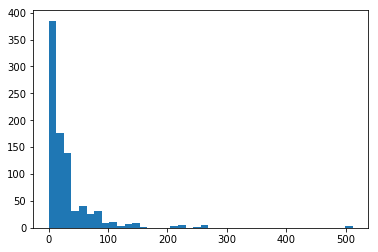

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data["Fare"], bins=40)
print()

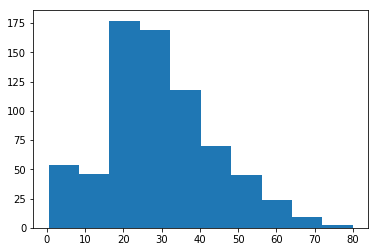

In [56]:
# The "Age" column is not missing for some of the passengers. 
# We need to exclude those to print a histogram.
plt.hist(data["Age"][data["Age"].notnull()])
print()

To get an idea if the age of a passenger had some relation with his or her chance to survive, we add a new "AgeClass" column.

In [68]:
import math

def classify_age(age):
    if age and not math.isnan(age): 
        # Use integer division.
        return int(age) // 10
    else:
        return -1  # instead of NaN
    
data["AgeClass"] = data["Age"].apply(classify_age)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


## Chance to survive 

I will analyse the Titanic dataset to find factors which increased the chance to survive the tragedy and those which did not have an effect.

Therefore I define the "chance of survival" as the probability of survival, i.e. the share of survivors in the population or a subgroup thereof:

$$ P_{survive}(group) = \frac{\textrm{number of survivors in } group}{\textrm{total number of persons}}$$


In [15]:
population_size = len(data)
num_survived = len(data[data["Survived"] == 1])
p_survival = num_survived / population_size
print("{} of {} survived, this corresponds to a survival chance of {:.3}"
     .format(num_survived, population_size, p_survival))

342 of 891 survived, this corresponds to a survival chance of 0.384



In the titanic dataset, over the whole population the chance to survive is $P_{survive}(total)=0.384$.

Lets compare  how different factors influence this chance. First, we define a function that calculates the probability to survive over groups defined by a factor.

In [23]:
def compute_survival_probabilty(criterion):
    grouped = data.groupby(criterion)
    return grouped.sum()["Survived"] / grouped.size()

Furthermore, we define a function to print the probability for each factor and create a bar plot.

In [182]:
def show_probability_for_criterion(criterion):
    
    def get_range_from_group_index(keys):
        if not type(keys[0]) == str:
            start = min(keys)
            end = max(keys) + 1
            return np.arange(start, end)
        return np.arange(len(keys))
    
    title = "Survival rate by {}".format(criterion)
    pp = compute_survival_probabilty(criterion)
    print(title)
    print(pp)
    keys = list(data.groupby(criterion).groups.keys())
    x = get_range_from_group_index(keys)
    %matplotlib inline
    plt.bar(x, pp)
    plt.xticks(x, keys)
    plt.title(title)
    plt.xlabel(criterion)
    plt.ylabel(r"$P_{survive}$")
    axes = plt.gca()
    axes.set_ylim([0, 1])
    

In the following, the data is grouped by sex, ticket class and the port of embarkation.

Survival rate by Sex
Sex
female    0.742038
male      0.188908
dtype: float64


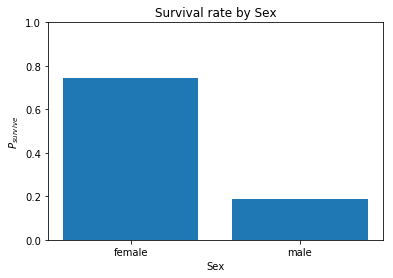

In [183]:
show_probability_for_criterion("Sex")

Survival rate by Pclass
Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


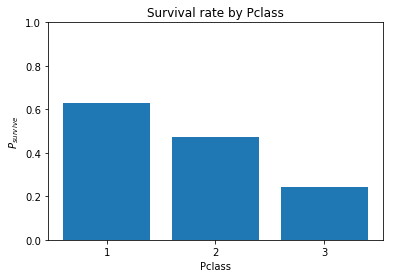

In [184]:
show_probability_for_criterion("Pclass")

Survival rate by Embarked
Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64


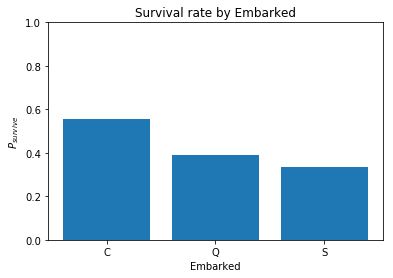

In [185]:
show_probability_for_criterion("Embarked")

Survival rate by AgeClass
AgeClass
-1    0.293785
 0    0.612903
 1    0.401961
 2    0.350000
 3    0.437126
 4    0.382022
 5    0.416667
 6    0.315789
 7    0.000000
 8    1.000000
dtype: float64


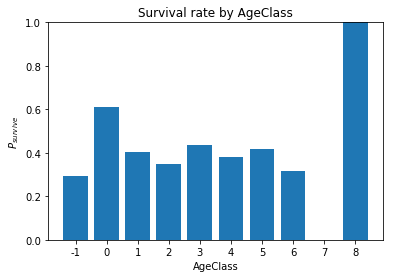

In [186]:
show_probability_for_criterion("AgeClass")

## Results

### Sex
### Ticket class
### Age
### Port of embarkation
The embarkation port seems to have an effect, too. Passengers embarked in Cherbourgh had a higher chance to survive than the average, and about 66% more of these passengers survived than of the passengers which embarked at Southampton. While this is unexpected at first, there might be a relation between the port and the other class. From what I know, Southampton used to be a large port for common people migrating to the U.S. Indeed, a look into the following figures show this relation:

Thus, the port of embarkation is a dependent variable (it depends on the ticket class).

## Conclusion

We have investigated the relation between different factors and the chance to survive the sinking of the Titanic. We have shown that sex, ticket class and the age are correlated to the survival rate. The embarkation port [...]